In [2]:
import numpy as np
import pandas as pd
import nltk
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


## Import Dataset

In [3]:
trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')

In [4]:
trainset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
testset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Clean Dataset

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18moh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18moh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18moh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
#Additional stopwords

stop_words.add('#')
stop_words.add('.')
stop_words.add(';')
stop_words.add(':')
stop_words.add('...')
stop_words.add('=')
stop_words.add('im')
stop_words.add('m')
stop_words.add('u')
stop_words.add('@')
stop_words.add('http')
stop_words.add('https')

print(stop_words)

{"wouldn't", 'who', 'being', 'has', 'few', 'so', 'the', 'him', 'to', 'had', "hadn't", 'those', 'his', "couldn't", 'i', 'a', '=', "she's", 'it', 'my', 'as', 'these', 'again', 'd', 'ain', 'only', 'was', 'do', 'very', 'she', 'itself', 'wouldn', "needn't", 'should', 'which', "you've", 'some', 'then', "didn't", 'that', 'needn', "that'll", 'off', 'll', 'but', 'no', 'too', 'does', ':', 'u', 'her', 'out', 'for', 'didn', 'is', 'just', "mightn't", 'mustn', "shouldn't", 'himself', 'ours', 'what', 'doesn', 'most', "you'd", 'o', 'http', 'more', 'any', 'https', "aren't", 'about', 'if', 'ma', "mustn't", 'shan', 'when', "you're", 'hasn', 'are', "hasn't", 'yourself', 'y', 'down', 'yourselves', 'above', 'doing', 'ourselves', 'im', 'them', 'up', 'we', "haven't", 'weren', '#', 'our', 'not', 'will', 'under', 'where', 'there', 'through', 'same', 'haven', 'now', 'after', 'this', 'aren', 't', "shan't", 'can', '@', "you'll", "wasn't", 'against', 'don', 'own', "won't", 'with', 'm', 'were', 'below', 've', 'hadn'

In [8]:
#Remove Stopwords

trainclean=trainset.copy()
testclean=testset.copy()

for i in range(len(trainset)):
    l=[]
    tkn=word_tokenize(trainset.at[i,'text']) 
    for x in tkn:
        if(x.lower() not in stop_words):
            l.append(x)
    for j in range(len(l)):
        if(l[j][0]=='\''):
            l[j]=l[j][1:]
    trainclean.at[i,'text']=l

for i in range(len(testset)):
    l=[]
    tkn=word_tokenize(testset.at[i,'text']) 
    for x in tkn:
        if(x.lower() not in stop_words):
            l.append(x)
    for j in range(len(l)):
        if(l[j][0]=='\''):
            l[j]=l[j][1:]
    testclean.at[i,'text']=l

trainclean.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...",1
1,4,NaN,NaN,"[Forest, fire, near, La, Ronge, Sask, Canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, , notified,...",1
3,6,NaN,NaN,"[13,000, people, receive, wildfires, evacuatio...",1
4,7,NaN,NaN,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...",1


In [9]:
#Lemmatization and Normalization

lem = WordNetLemmatizer()
ps=PorterStemmer()

for i in range(len(trainclean)):
    lemmatized=[]
    l=trainclean.at[i,'text']
    for x in l:
        if(x!=''):
            lemmatized.append(lem.lemmatize(x).lower())
    trainclean.at[i,'text']=lemmatized
    
for i in range(len(testclean)):
    lemmatized=[]
    l=testclean.at[i,'text']
    for x in l:
        if(x!=''):
            lemmatized.append(lem.lemmatize(x).lower())
    testclean.at[i,'text']=lemmatized

trainclean.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1
3,6,NaN,NaN,"[13,000, people, receive, wildfire, evacuation...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


## Term Frequency Based Classification - 1 Level (Adapted TFIDF)

In [10]:
#Create a dataframe to represent the vector set and corresponding frequencies of terms

column_names=['term','0','1']

vec=pd.DataFrame(columns=column_names)

for i in range(len(trainclean)):
    l=trainclean.at[i,'text']
    target=trainclean.at[i,'target']
    for x in l:
        if(x not in vec.values):
            row={'term': x, '0': int(target==0), '1': int(target==1)}
            vec=vec.append(row, ignore_index=True)
        elif(target==0):
            vec.loc[vec['term']==x,'0']+=1
        elif(target==1):
            vec.loc[vec['term']==x,'1']+=1

vec.head()
print(len(vec))

22259


In [11]:
#Remove rare words to eliminate biases and prevent overfitting

vec.drop(vec[(vec['0']<=1) & (vec['1']<=1)].index,inplace=True,axis=0)

vec.reset_index(drop=True, inplace=True)

vec.head()

,term,0,1
0,reason,20,7
1,earthquake,6,45
2,may,38,50
3,allah,3,6
4,u,53,14


In [12]:
#Assign weights to terms

#Weight is proportional to the frequency difference between the classifications and the ratio

vec['weight']=0.0

for i in range(len(vec)):
    yes=vec.at[i,'1']
    no=vec.at[i,'0']
    vec.at[i,'weight']=-(math.log(0.5+no/(yes+no))**3)*math.log(0.5+abs(yes-no))

vec.sort_values(by='weight', ascending=False).head(30)

,term,0,1,weight
3333,mh370,0,71,1.421915
1172,northern,0,64,1.387602
3593,legionnaires,0,61,1.371741
2351,hiroshima,1,88,1.350476
553,debris,0,50,1.306114
3431,severe,0,47,1.285718
3548,migrant,0,43,1.256422
2852,derailment,0,40,1.232625
4627,investigators,0,37,1.206995
1295,mosque,0,35,1.188742


In [13]:
#Score training data

trainclean['reclassify']=0
trainclean['score']=0.0

for i in range(len(trainclean)):
    l=trainclean.at[i,'text']
    for x in l:
        if(x in vec.values):
            trainclean.at[i,'score']+=vec.loc[vec['term']==x].weight
        
trainclean.head()

,id,keyword,location,text,target,reclassify,score
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,0,0.332334
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,0,1.031330
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1,0,2.226890
3,6,NaN,NaN,"[13,000, people, receive, wildfire, evacuation...",1,0,2.648211
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,0,1.085963


In [14]:
#Reclassify training data

for i in range(len(trainclean)):
    if(trainclean.at[i,'score']>0):
        trainclean.at[i,'reclassify']=1
    else:
        trainclean.at[i,'reclassify']=0
        
trainclean.head(30)

,id,keyword,location,text,target,reclassify,score
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,1,0.332334
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,1,1.031330
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1,1,2.226890
3,6,NaN,NaN,"[13,000, people, receive, wildfire, evacuation...",1,1,2.648211
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,1,1.085963
5,8,NaN,NaN,"[rockyfire, update, >, california, hwy, 20, cl...",1,1,4.353956
6,10,NaN,NaN,"[flood, disaster, heavy, rain, cause, flash, f...",1,1,1.195915
7,13,NaN,NaN,"[m, top, hill, see, fire, wood]",1,0,-0.040420
8,14,NaN,NaN,"[s, emergency, evacuation, happening, building...",1,1,0.261738
9,15,NaN,NaN,"[m, afraid, tornado, coming, area]",1,1,0.291065


In [15]:
#Score model on training data

correct=0
incorrect=0

for i in range(len(trainclean)):
    if(trainclean.at[i,'target']==trainclean.at[i,'reclassify']):
        correct+=1
    else:
        incorrect+=1
        
        
print(correct/(correct+incorrect))
print(len(vec))

0.8606331275449889
5724


### With this method, the training score is 0.8606331275449889

In [16]:
#Classifying the test data

testclean['target']=0
testclean['score']=0.0

for i in range(len(testclean)):
    l=testclean.at[i,'text']
    for x in l:
        if(x in vec.values):
            testclean.at[i,'score']+=vec.loc[vec['term']==x].weight
        
for i in range(len(testclean)):
    if(testclean.at[i,'score']>0):
        testclean.at[i,'target']=1
    else:
        testclean.at[i,'target']=0
        
testclean.head(30)

,id,keyword,location,text,target,score
0,0,NaN,NaN,"[happened, terrible, car, crash]",1,0.082752
1,2,NaN,NaN,"[heard, earthquake, different, city, ,, stay, ...",1,0.395399
2,3,NaN,NaN,"[forest, fire, spot, pond, ,, goose, fleeing, ...",1,1.018889
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfire]",1,1.133418
4,11,NaN,NaN,"[typhoon, soudelor, kill, 28, china, taiwan]",1,2.936465
5,12,NaN,NaN,"[re, shaking, s, earthquake]",1,0.384637
6,21,NaN,NaN,"[d, probably, still, show, life, arsenal, yest...",0,-0.562373
7,22,NaN,NaN,"[hey, !, ?]",0,-0.235122
8,27,NaN,NaN,"[nice, hat, ?]",0,-0.230296
9,29,NaN,NaN,"[fuck, !]",0,-0.135317


In [17]:
#Export test classification

testclean[['id','target']].to_csv('solution1.csv', index=False)

### The test score for this method is 0.79754

# Term Frequency Based Classification - multi-level (Adapted TFIDF)

### Data Visualization

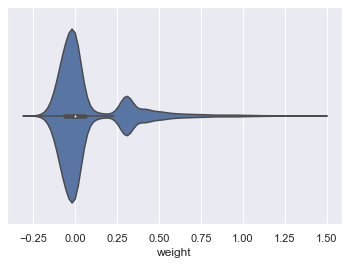

In [18]:
#Weight distribution of terms in the word-vector

sb.violinplot(vec['weight'])
plt.show()
plt.close()

In [19]:
trainclean.head()

,id,keyword,location,text,target,reclassify,score
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,1,0.332334
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,1,1.031330
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1,1,2.226890
3,6,NaN,NaN,"[13,000, people, receive, wildfire, evacuation...",1,1,2.648211
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,1,1.085963


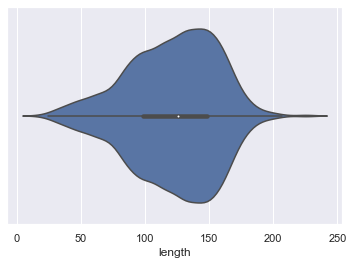

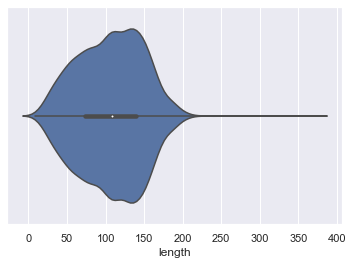

In [20]:
#Tweet length vs. target

trainclean['length']=0

for i in range(len(trainclean)):
    length=len(str(trainclean.at[i,'text']))
    trainclean.at[i,'length']=length
    

sb.violinplot(trainclean.loc[trainclean['target']==1]['length'])
plt.show()
plt.close()

sb.violinplot(trainclean.loc[trainclean['target']==0]['length'])
plt.show()
plt.close()


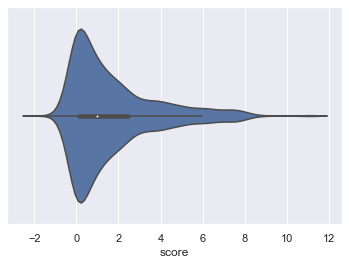

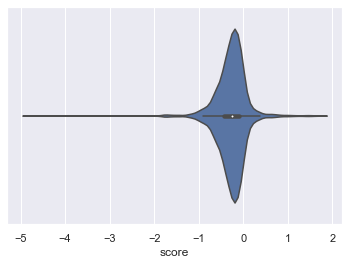

In [21]:
#Tweet score vs. target

sb.violinplot(trainclean.loc[trainclean['target']==1]['score'])
plt.show()
plt.close()

sb.violinplot(trainclean.loc[trainclean['target']==0]['score'])
plt.show()
plt.close()


In [22]:
#Location vs. target

place=trainclean[['location']].drop_duplicates()
place['0']=0
place['1']=0
place.reset_index(drop=True, inplace=True)

for i in range(len(trainclean)):
    location=trainclean.at[i,'location']
    target=trainclean.at[i,'target']
    if(target==1):
        place.loc[place['location']==location,'1']+=1
    elif(target==0):
        place.loc[place['location']==location,'0']+=1

place.head(50)

,location,0,1
0,NaN,0,0
1,Birmingham,1,3
2,Est. September 2012 - Bristol,1,0
3,AFRICA,0,1
4,"Philadelphia, PA",2,2
5,"London, UK",5,5
6,Pretoria,2,0
7,World Wide!!,0,1
8,Paranaque City,1,0
9,Live On Webcam,2,0


In [23]:
#Keyword vs. target

key=trainclean[['keyword']].drop_duplicates()
key['0']=0
key['1']=0
key.reset_index(drop=True, inplace=True)

for i in range(len(trainclean)):
    keyword=trainclean.at[i,'keyword']
    target=trainclean.at[i,'target']
    if(target==1):
        key.loc[key['keyword']==keyword,'1']+=1
    elif(target==0):
        key.loc[key['keyword']==keyword,'0']+=1

key.head(50)

,keyword,0,1
0,NaN,0,0
1,ablaze,23,13
2,accident,11,24
3,aftershock,34,0
4,airplane%20accident,5,30
5,ambulance,18,20
6,annihilated,23,11
7,annihilation,19,10
8,apocalypse,23,9
9,armageddon,37,5


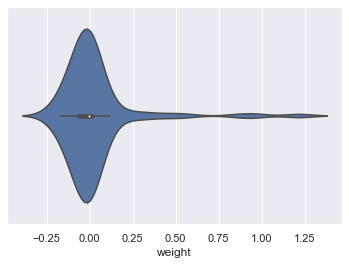

,keyword,0,1,weight
0,NaN,0,0,0.000000
1,ablaze,23,13,-0.005172
2,accident,11,24,0.022568
3,aftershock,34,0,-0.236038
4,airplane%20accident,5,30,0.279345
5,ambulance,18,20,0.000017
6,annihilated,23,11,-0.010842
7,annihilation,19,10,-0.006757
8,apocalypse,23,9,-0.020703
9,armageddon,37,5,-0.117065


In [24]:
#Weigh keywords

key['weight']=0.0

for i in range(len(key)):        
    yes=key.at[i,'1']
    no=key.at[i,'0']
    if(yes+no==0):
        key.at[i,'weight']=0.0
    else:
        key.at[i,'weight']=-(math.log(0.5+no/(yes+no))**3)*math.log(0.5+abs(yes-no))



sb.violinplot(key['weight'])
plt.show()
plt.close()

key.head(50)

In [25]:
#Prediction using keywords

trainclean['keyscore']=0.0

for i in range(len(trainclean)):
    keyword=trainclean.at[i,'keyword']
    if(keyword in key.values):
        trainclean.at[i,'keyscore']=key.loc[key['keyword']==keyword].iloc[0]['weight']
    if(trainclean.at[i,'keyscore']>0):
        trainclean.at[i,'reclassify']=1
    else:
        trainclean.at[i,'reclassify']=0

trainclean.head(50)

,id,keyword,location,text,target,reclassify,score,length,keyscore
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,0,0.332334,65,0.000000
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,0,1.031330,59,0.000000
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1,0,2.226890,119,0.000000
3,6,NaN,NaN,"[13,000, people, receive, wildfire, evacuation...",1,0,2.648211,80,0.000000
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,0,1.085963,82,0.000000
5,8,NaN,NaN,"[rockyfire, update, >, california, hwy, 20, cl...",1,0,4.353956,138,0.000000
6,10,NaN,NaN,"[flood, disaster, heavy, rain, cause, flash, f...",1,0,1.195915,125,0.000000
7,13,NaN,NaN,"[m, top, hill, see, fire, wood]",1,0,-0.040420,43,0.000000
8,14,NaN,NaN,"[s, emergency, evacuation, happening, building...",1,0,0.261738,77,0.000000
9,15,NaN,NaN,"[m, afraid, tornado, coming, area]",1,0,0.291065,44,0.000000


In [26]:
#Score model on training data

correct=0
incorrect=0

for i in range(len(trainclean)):
    if(trainclean.at[i,'target']==trainclean.at[i,'reclassify']):
        correct+=1
    else:
        incorrect+=1
        
print(correct/(correct+incorrect))

0.7424142913437541


## Predicting using keywords and tweets

In [95]:
#Training a perceptron with keyscore and score

def predict(score,keyscore,b,w1,w2):
    total=b+score*w1+keyscore*w2
    if(total>0):
        return 1
    else:
        return 0
    
def accuracy(trainclean,b,w1,w2):
    correct=0
    incorrect=0
    for i in range(len(trainclean)):
        if(trainclean.at[i,'target']==predict(trainclean.at[i,'score'],trainclean.at[i,'keyscore'],b,w1,w2)):
            correct+=1
        else:
            incorrect+=1
    return (correct/(correct+incorrect))
    
def train(trainclean,weights,learnrate):
    err=1-accuracy(trainclean,w[0],w[1],w[2])
    rate=err*learnrate
    
    inc0=True
    inc1=True
    inc2=True
    
    err1=1-accuracy(trainclean,w[0]+rate,w[1],w[2])
    err2=1-accuracy(trainclean,w[0]-rate,w[1],w[2])
    if(err1<err2):
        pass
    else:
        inc0=False
        
    err1=1-accuracy(trainclean,w[0],w[1]+rate,w[2])
    err2=1-accuracy(trainclean,w[0],w[1]-rate,w[2])
    if(err1<err2):
        pass
    else:
        inc1=False
        
    err1=1-accuracy(trainclean,w[0],w[1],w[2]+rate)
    err2=1-accuracy(trainclean,w[0],w[1],w[2]-rate)
    if(err1<err2):
        pass
    else:
        inc2=False
        
    if(inc0):
        w[0]=w[0]+rate
    else:
        w[0]=w[0]-rate
        
    if(inc1):
        w[1]=w[1]+rate
    else:
        w[1]=w[1]-rate
        
    if(inc2):
        w[2]=w[2]+rate
    else:
        w[2]=w[2]-rate

In [131]:
#Initial weights

w=[0.5,1,1]
learnrate=2

In [132]:
#Conduct training

for i in range(50):
    train(trainclean,w,learnrate)
    learnrate=learnrate-2/50
print(accuracy(trainclean,w[0],w[1],w[2]))

0.8678576119795087


In [136]:
#Final weights

print(w[0])
print(w[1])
print(w[2])


-0.13677393931433113
2.2751241297780114
1.3685170103769884


,id,keyword,location,text,target,score,keyscore,reclassify
0,0,NaN,NaN,"[happened, terrible, car, crash]",1,0.082752,0.0,0.0
1,2,NaN,NaN,"[heard, earthquake, different, city, ,, stay, ...",1,0.395399,0.0,0.0
2,3,NaN,NaN,"[forest, fire, spot, pond, ,, goose, fleeing, ...",1,1.018889,0.0,0.0
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfire]",1,1.133418,0.0,0.0
4,11,NaN,NaN,"[typhoon, soudelor, kill, 28, china, taiwan]",1,2.936465,0.0,0.0


In [139]:
#Classify train data

for i in range(len(trainclean)):
    trainclean.at[i,'reclassify']=predict(trainclean.at[i,'score'],trainclean.at[i,'keyscore'],w[0],w[1],w[2])
    
#Classify test data

testclean['keyscore']=0.0

for i in range(len(testclean)):
    keyword=testclean.at[i,'keyword']
    if(keyword in key.values):
        testclean.at[i,'keyscore']=key.loc[key['keyword']==keyword].iloc[0]['weight']

for i in range(len(testclean)):
    testclean.at[i,'target']=predict(testclean.at[i,'score'],testclean.at[i,'keyscore'],w[0],w[1],w[2])
    
testclean.head(30)

,id,keyword,location,text,target,score,keyscore,reclassify
0,0,NaN,NaN,"[happened, terrible, car, crash]",1,0.082752,0.000000,0.0
1,2,NaN,NaN,"[heard, earthquake, different, city, ,, stay, ...",1,0.395399,0.000000,0.0
2,3,NaN,NaN,"[forest, fire, spot, pond, ,, goose, fleeing, ...",1,1.018889,0.000000,0.0
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfire]",1,1.133418,0.000000,0.0
4,11,NaN,NaN,"[typhoon, soudelor, kill, 28, china, taiwan]",1,2.936465,0.000000,0.0
5,12,NaN,NaN,"[re, shaking, s, earthquake]",1,0.384637,0.000000,0.0
6,21,NaN,NaN,"[d, probably, still, show, life, arsenal, yest...",0,-0.562373,0.000000,0.0
7,22,NaN,NaN,"[hey, !, ?]",0,-0.235122,0.000000,0.0
8,27,NaN,NaN,"[nice, hat, ?]",0,-0.230296,0.000000,0.0
9,29,NaN,NaN,"[fuck, !]",0,-0.135317,0.000000,0.0


In [140]:
#Export test classification

testclean[['id','target']].to_csv('solution1.csv', index=False)